### CA1 – Machine Learning HDip
#### Author: Cristhian Macedo - 2024104
[GitHub Repository](https://github.com/CristhianMacedo2024104/Machine-Learning)

### 1.1 Importing libraries

Importing the required libraries "`pandas`" to start the project.

Also importing "`numpy`", "`seaborn`", "`matplotlib.pyplot`" and "`sklearn.decomposition`", in case it needs other libraries it will be imported when necessary it comes.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

### 1.2	Loading Data from a CSV File

Loading the dataset using the function “`.read_csv`” to import the required data existing in the Comma-separated values "`.csv`" file in the `df` variable.

In [2]:
df = pd.read_csv("HPM04.20240406T220445.csv")

### 1.3	Inspecting the Data Set

The first command useful to start understanding the data is “`.head()`” to check the first 5 observations as default and features contained in the data frame after loaded. 

This command was important and necessary to get the first impression of it, returning that this dataset has **5** rows (observations) and **14** columns (features).

In [3]:
df.head()

,STATISTIC,Statistic Label,TLIST(M1),Month,C03346V04033,Dwelling Status,C03349V04063,Eircode Output,C03341V04028,Stamp Duty Event,C03344V04031,Type of Buyer,UNIT,VALUE
0,HPM04C01,Volume of Sales,202201,2022 January,-,All Dwelling Statuses,-,All,1,Filings,-,All Buyer Types,Number,3519.0
1,HPM04C01,Volume of Sales,202201,2022 January,-,All Dwelling Statuses,-,All,1,Filings,02,Household Buyer - First-Time Buyer Owner-Occupier,Number,1181.0
2,HPM04C01,Volume of Sales,202201,2022 January,-,All Dwelling Statuses,-,All,1,Filings,03,Household Buyer - Former Owner-Occupier,Number,1803.0
3,HPM04C01,Volume of Sales,202201,2022 January,-,All Dwelling Statuses,-,All,1,Filings,04,Household Buyer - Non-Occupier,Number,535.0
4,HPM04C01,Volume of Sales,202201,2022 January,-,All Dwelling Statuses,-,All,2,Executions,-,All Buyer Types,Number,2884.0


Thereafter using the command “`shape`” shows us the complete body of the data, in this case **336000** observations and **14** features to be analysed.

In [4]:
df.shape

(336000, 14)

Used “```.info()```” next to print a concise summary of a data frame.

Getting this information it was necessary to learn the names of features existing and the difference between the total of observations shown before in the “`shape`” command and their respective data types.

In [5]:
# df.info()

The "`.describe()`" function shows us a little more about each feature, we can see statistics information about: count, mean, standard deviation, min, Q1 25%, Q2 50%, Q3 75% and max 

In [6]:
# df.describe()

In [7]:
df.columns

Index(['STATISTIC', 'Statistic Label', 'TLIST(M1)', 'Month', 'C03346V04033',
       'Dwelling Status', 'C03349V04063', 'Eircode Output', 'C03341V04028',
       'Stamp Duty Event', 'C03344V04031', 'Type of Buyer', 'UNIT', 'VALUE'],
      dtype='object')

In [8]:
# pip install ydata-profiling

In [9]:
# from ydata_profiling import ProfileReport

# ProfileReport(df)

### 1.4 Checking the types of data

In [10]:
df.dtypes

STATISTIC            object
Statistic Label      object
TLIST(M1)             int64
Month                object
C03346V04033         object
Dwelling Status      object
C03349V04063         object
Eircode Output       object
C03341V04028          int64
Stamp Duty Event     object
C03344V04031         object
Type of Buyer        object
UNIT                 object
VALUE               float64
dtype: object

In [11]:
df['Type of Buyer'].unique()

array(['All Buyer Types',
       'Household Buyer - First-Time Buyer Owner-Occupier',
       'Household Buyer - Former Owner-Occupier',
       'Household Buyer - Non-Occupier'], dtype=object)

## 2. Data Preparation

### 2.1 Finding Unique Values

- Keeping the columns:  STATISTIC, TLIST(M1), Month, C03346V04033, C03349V04063, Eircode Output, C03341V04028, C03344V04031, UNIT and VALUE

In [12]:
df.columns

Index(['STATISTIC', 'Statistic Label', 'TLIST(M1)', 'Month', 'C03346V04033',
       'Dwelling Status', 'C03349V04063', 'Eircode Output', 'C03341V04028',
       'Stamp Duty Event', 'C03344V04031', 'Type of Buyer', 'UNIT', 'VALUE'],
      dtype='object')

In [13]:
df['Type of Buyer'].unique()

array(['All Buyer Types',
       'Household Buyer - First-Time Buyer Owner-Occupier',
       'Household Buyer - Former Owner-Occupier',
       'Household Buyer - Non-Occupier'], dtype=object)

'Dwelling Status ID', 'Eircode ID', 'Type of Buyer ID' with '-' values 

In [14]:
df.isnull().mean().round(2) * 100

STATISTIC            0.0
Statistic Label      0.0
TLIST(M1)            0.0
Month                0.0
C03346V04033         0.0
Dwelling Status      0.0
C03349V04063         0.0
Eircode Output       0.0
C03341V04028         0.0
Stamp Duty Event     0.0
C03344V04031         0.0
Type of Buyer        0.0
UNIT                 0.0
VALUE               12.0
dtype: float64

In [15]:
# pip install missingno

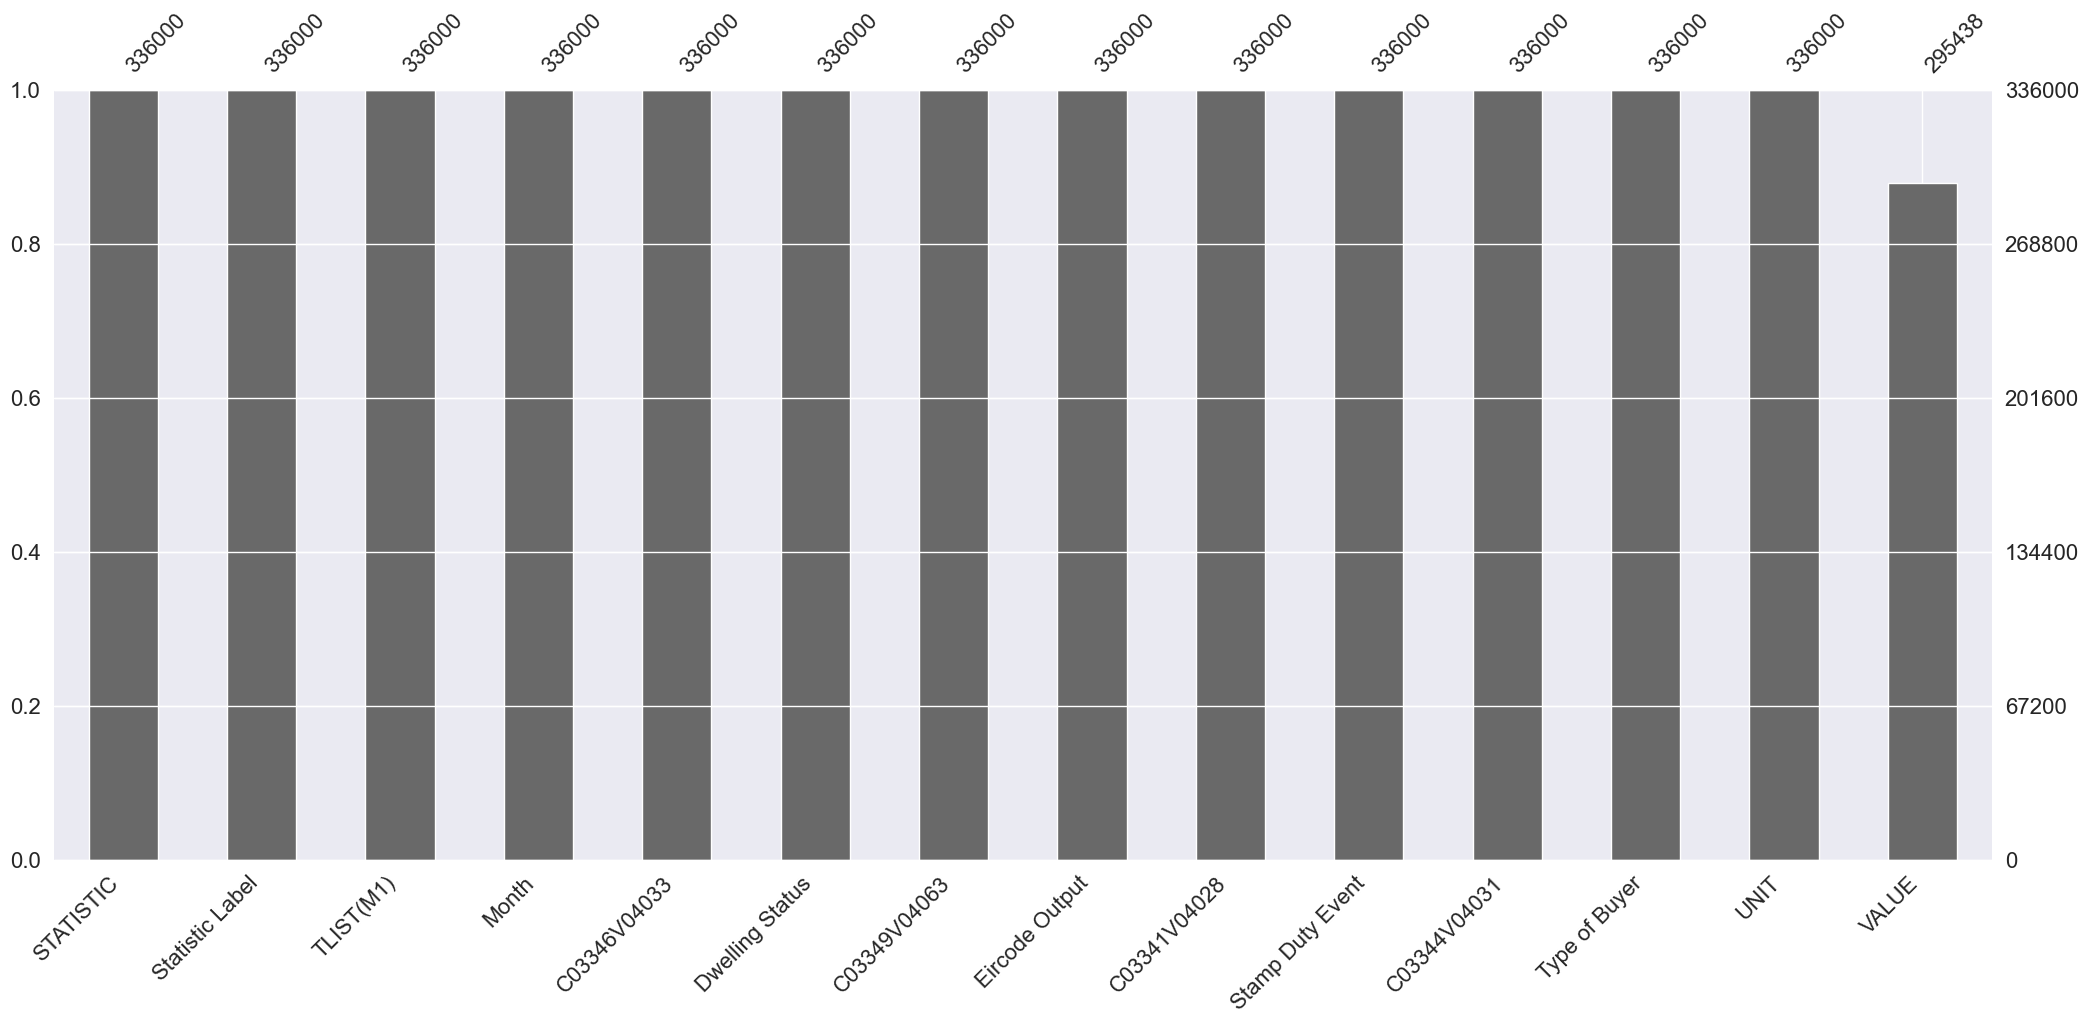

In [16]:
import missingno as msno
ax = msno.bar(df.sample(336000))

In [17]:
missing_value_formats = ["?", "UnKnown", "Na", "Nan"]
df.replace(missing_value_formats, np.nan, inplace = True)
df = df.dropna(axis = 0)

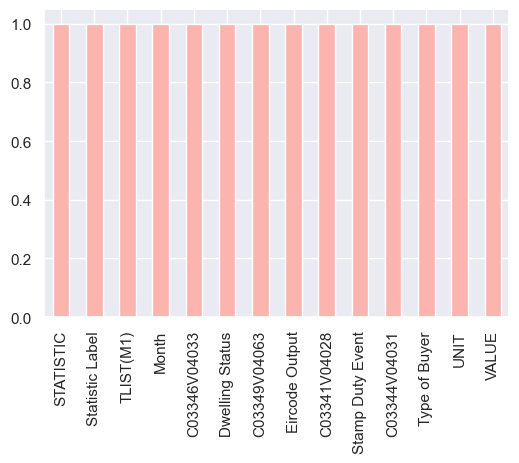

In [18]:
#https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
fig, ax = plt.subplots(figsize=(6, 4))
(1 - df.isnull().mean()).abs().plot.bar(ax=ax, colormap='Pastel1');

### 2.2 Replacing Values (Syntax errors)

- STATISTIC - 1: Volume of Sales, 2: Value of Sales, 3: Mean Sale Price and 4: Median Price
- C03346V04033 - 1: All Dwelling Statuses, 2: New and 3: Existing
- C03341V04028 - 1: Filings and 2: Executions
- C03344V04031 - 1: All Buyer Types, 2: Household Buyer - First-Time Buyer Owner-Occupier, 3: Household Buyer - Former Owner-Occupier and 4: Household Buyer - Non-Occupier

In [19]:
df['STATISTIC'] = df['STATISTIC'].replace(["HPM04C01", 'HPM04C02', 'HPM04C03', 'HPM04C04'], ["01", "02", "03", "04"])
df['C03346V04033'] = df['C03346V04033'].replace(["-", '01', '02'], ["01", "02", "03"])
df['C03349V04063'] = df['C03349V04063'].replace(["-"], ["All"])
df['C03344V04031'] = df['C03344V04031'].replace(["-", '02', '03', '04'], ["01", "02", "03", "04"])

In [20]:
df.head(2)

,STATISTIC,Statistic Label,TLIST(M1),Month,C03346V04033,Dwelling Status,C03349V04063,Eircode Output,C03341V04028,Stamp Duty Event,C03344V04031,Type of Buyer,UNIT,VALUE
0,01,Volume of Sales,202201,2022 January,01,All Dwelling Statuses,All,All,1,Filings,01,All Buyer Types,Number,3519.0
1,01,Volume of Sales,202201,2022 January,01,All Dwelling Statuses,All,All,1,Filings,02,Household Buyer - First-Time Buyer Owner-Occupier,Number,1181.0


### 2.3 Dropping Irrelevant Columns

- Dropping:  Statistic Label, Dwelling Status, Stamp Duty Event and Type of Buyer

In [21]:
df = df.drop(columns = ['Statistic Label', 'Dwelling Status', 'Stamp Duty Event', 'Type of Buyer'])

In [22]:
df.head()

,STATISTIC,TLIST(M1),Month,C03346V04033,C03349V04063,Eircode Output,C03341V04028,C03344V04031,UNIT,VALUE
0,01,202201,2022 January,01,All,All,1,01,Number,3519.0
1,01,202201,2022 January,01,All,All,1,02,Number,1181.0
2,01,202201,2022 January,01,All,All,1,03,Number,1803.0
3,01,202201,2022 January,01,All,All,1,04,Number,535.0
4,01,202201,2022 January,01,All,All,2,01,Number,2884.0


### 2.4 Renaming Columns

- Renaming: STATISTIC to Statistic, TLIST(M1) to Year/Month, C03346V04033 to Dwelling Status, C03349V04063 to Eircode, C03341V04028 to Stamp Duty Event, C03344V04031 to Type of Buyer, UNIT to Unit, VALUE to Price

- Statistic - 1: Volume of Sales, 2: Value of Sales, 3: Mean Sale Price and 4: Median Price
- Dwelling Status - 1: All Dwelling Statuses, 2: New and 3: Existing
- Stamp Duty Event - 1: Filings and 2: Executions
- Type of Buyer - 1: All Buyer Types, 2: Household Buyer - First-Time Buyer Owner-Occupier, 3: Household Buyer - Former Owner-Occupier and 4: Household Buyer - Non-Occupier

In [23]:
df = df.rename(columns= {'STATISTIC': 'Statistic', 'TLIST(M1)': 'Year/Month', 'C03346V04033': 'Dwelling Status', 'C03349V04063': 'Eircode', 'C03341V04028': 'Stamp Duty Event', 'C03344V04031': 'Type of Buyer', 'UNIT': 'Unit', 'VALUE': 'Price'})

In [24]:
df.head()

,Statistic,Year/Month,Month,Dwelling Status,Eircode,Eircode Output,Stamp Duty Event,Type of Buyer,Unit,Price
0,01,202201,2022 January,01,All,All,1,01,Number,3519.0
1,01,202201,2022 January,01,All,All,1,02,Number,1181.0
2,01,202201,2022 January,01,All,All,1,03,Number,1803.0
3,01,202201,2022 January,01,All,All,1,04,Number,535.0
4,01,202201,2022 January,01,All,All,2,01,Number,2884.0


### 2.4 Creating Dummies

In [25]:
df = pd.get_dummies(df, columns=["Statistic", "Dwelling Status", "Stamp Duty Event", "Type of Buyer", "Unit"])

In [26]:
df.head(5)

,Year/Month,Month,Eircode,Eircode Output,Price,Statistic_01,Statistic_02,Statistic_03,Statistic_04,Dwelling Status_01,...,Dwelling Status_03,Stamp Duty Event_1,Stamp Duty Event_2,Type of Buyer_01,Type of Buyer_02,Type of Buyer_03,Type of Buyer_04,Unit_Euro,Unit_Euro Million,Unit_Number
0,202201,2022 January,All,All,3519.0,True,False,False,False,True,...,False,True,False,True,False,False,False,False,False,True
1,202201,2022 January,All,All,1181.0,True,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
2,202201,2022 January,All,All,1803.0,True,False,False,False,True,...,False,True,False,False,False,True,False,False,False,True
3,202201,2022 January,All,All,535.0,True,False,False,False,True,...,False,True,False,False,False,False,True,False,False,True
4,202201,2022 January,All,All,2884.0,True,False,False,False,True,...,False,False,True,True,False,False,False,False,False,True


In [27]:
df.columns

Index(['Year/Month', 'Month', 'Eircode', 'Eircode Output', 'Price',
       'Statistic_01', 'Statistic_02', 'Statistic_03', 'Statistic_04',
       'Dwelling Status_01', 'Dwelling Status_02', 'Dwelling Status_03',
       'Stamp Duty Event_1', 'Stamp Duty Event_2', 'Type of Buyer_01',
       'Type of Buyer_02', 'Type of Buyer_03', 'Type of Buyer_04', 'Unit_Euro',
       'Unit_Euro Million', 'Unit_Number'],
      dtype='object')

In [29]:
# df = df.drop(columns = ['Statistic_HPM04C02', 'Statistic_HPM04C03', 'Statistic_HPM04C04', 'Dwelling Status_01', 'Dwelling Status_02', 'Stamp Duty Event_2', 'Type of Buyer_02', 'Type of Buyer_03', 'Type of Buyer_04', 'Unit_Euro Million', 'Unit_Number'])

In [32]:
# df.columns

In [31]:
# df = df.rename(columns= {'Statistic_HPM04C01': 'Statistic', 'Dwelling Status_-': 'Dwelling Status', 'Stamp Duty Event_1': 'Stamp Duty Event', 'Type of Buyer_-': 'Type of Buyer', 'Unit_Euro': 'Unit'})

In [33]:
# df.head()

### 2.5 Handling Missing Values

In [36]:
df.isnull().sum()

Year/Month            0
Month                 0
Eircode               0
Eircode Output        0
Price                 0
Statistic_01          0
Statistic_02          0
Statistic_03          0
Statistic_04          0
Dwelling Status_01    0
Dwelling Status_02    0
Dwelling Status_03    0
Stamp Duty Event_1    0
Stamp Duty Event_2    0
Type of Buyer_01      0
Type of Buyer_02      0
Type of Buyer_03      0
Type of Buyer_04      0
Unit_Euro             0
Unit_Euro Million     0
Unit_Number           0
dtype: int64

In [37]:
df[df['Price'].isnull()].head()

,Year/Month,Month,Eircode,Eircode Output,Price,Statistic_01,Statistic_02,Statistic_03,Statistic_04,Dwelling Status_01,...,Dwelling Status_03,Stamp Duty Event_1,Stamp Duty Event_2,Type of Buyer_01,Type of Buyer_02,Type of Buyer_03,Type of Buyer_04,Unit_Euro,Unit_Euro Million,Unit_Number


### 2.6 Imputing Missing Values

### 2.7 Handling Duplicates Rows

In [38]:
df[df.duplicated()].shape

(0, 21)

In [39]:
df.count()

Year/Month            295438
Month                 295438
Eircode               295438
Eircode Output        295438
Price                 295438
Statistic_01          295438
Statistic_02          295438
Statistic_03          295438
Statistic_04          295438
Dwelling Status_01    295438
Dwelling Status_02    295438
Dwelling Status_03    295438
Stamp Duty Event_1    295438
Stamp Duty Event_2    295438
Type of Buyer_01      295438
Type of Buyer_02      295438
Type of Buyer_03      295438
Type of Buyer_04      295438
Unit_Euro             295438
Unit_Euro Million     295438
Unit_Number           295438
dtype: int64

### 2.8 Type Conversion

In [40]:
df.dtypes

Year/Month              int64
Month                  object
Eircode                object
Eircode Output         object
Price                 float64
Statistic_01             bool
Statistic_02             bool
Statistic_03             bool
Statistic_04             bool
Dwelling Status_01       bool
Dwelling Status_02       bool
Dwelling Status_03       bool
Stamp Duty Event_1       bool
Stamp Duty Event_2       bool
Type of Buyer_01         bool
Type of Buyer_02         bool
Type of Buyer_03         bool
Type of Buyer_04         bool
Unit_Euro                bool
Unit_Euro Million        bool
Unit_Number              bool
dtype: object

In [41]:
df.head(2)

,Year/Month,Month,Eircode,Eircode Output,Price,Statistic_01,Statistic_02,Statistic_03,Statistic_04,Dwelling Status_01,...,Dwelling Status_03,Stamp Duty Event_1,Stamp Duty Event_2,Type of Buyer_01,Type of Buyer_02,Type of Buyer_03,Type of Buyer_04,Unit_Euro,Unit_Euro Million,Unit_Number
0,202201,2022 January,All,All,3519.0,True,False,False,False,True,...,False,True,False,True,False,False,False,False,False,True
1,202201,2022 January,All,All,1181.0,True,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True


### 2.9 Relationships

In [42]:
# df.columns

,Statistic_01,Statistic_02,Statistic_03,Statistic_04,Dwelling Status_01,Dwelling Status_02,Dwelling Status_03,Stamp Duty Event_1,Stamp Duty Event_2,Type of Buyer_01,Type of Buyer_02,Type of Buyer_03,Type of Buyer_04,Unit_Euro,Unit_Euro Million,Unit_Number
Statistic_01,1.000000,-0.397280,-0.330523,-0.330523,-0.039697,0.081984,-0.036478,-0.000969,0.000969,-0.022376,-0.003147,-0.011694,0.039254,-0.548963,-0.397280,1.000000
Statistic_02,-0.397280,1.000000,-0.330523,-0.330523,-0.039697,0.081984,-0.036478,-0.000969,0.000969,-0.022376,-0.003147,-0.011694,0.039254,-0.548963,1.000000,-0.397280
Statistic_03,-0.330523,-0.330523,1.000000,-0.274984,0.043538,-0.089918,0.040008,0.001062,-0.001062,0.024541,0.003451,0.012825,-0.043053,0.602086,-0.330523,-0.330523
Statistic_04,-0.330523,-0.330523,-0.274984,1.000000,0.043538,-0.089918,0.040008,0.001062,-0.001062,0.024541,0.003451,0.012825,-0.043053,0.602086,-0.330523,-0.330523
Dwelling Status_01,-0.039697,-0.039697,0.043538,0.043538,1.000000,-0.465835,-0.568331,-0.000754,0.000754,-0.012012,-0.003733,-0.002632,0.019375,0.072312,-0.039697,-0.039697
Dwelling Status_02,0.081984,0.081984,-0.089918,-0.089918,-0.465835,1.000000,-0.463324,0.001569,-0.001569,0.024054,0.011984,0.004032,-0.042196,-0.149344,0.081984,0.081984
Dwelling Status_03,-0.036478,-0.036478,0.040008,0.040008,-0.568331,-0.463324,1.000000,-0.000704,0.000704,-0.010337,-0.007405,-0.001114,0.019832,0.066448,-0.036478,-0.036478
Stamp Duty Event_1,-0.000969,-0.000969,0.001062,0.001062,-0.000754,0.001569,-0.000704,1.000000,-1.000000,-0.000127,0.000417,0.000223,-0.000533,0.001764,-0.000969,-0.000969
Stamp Duty Event_2,0.000969,0.000969,-0.001062,-0.001062,0.000754,-0.001569,0.000704,-1.000000,1.000000,0.000127,-0.000417,-0.000223,0.000533,-0.001764,0.000969,0.000969
Type of Buyer_01,-0.022376,-0.022376,0.024541,0.024541,-0.012012,0.024054,-0.010337,-0.000127,0.000127,1.000000,-0.349285,-0.354796,-0.323200,0.040760,-0.022376,-0.022376


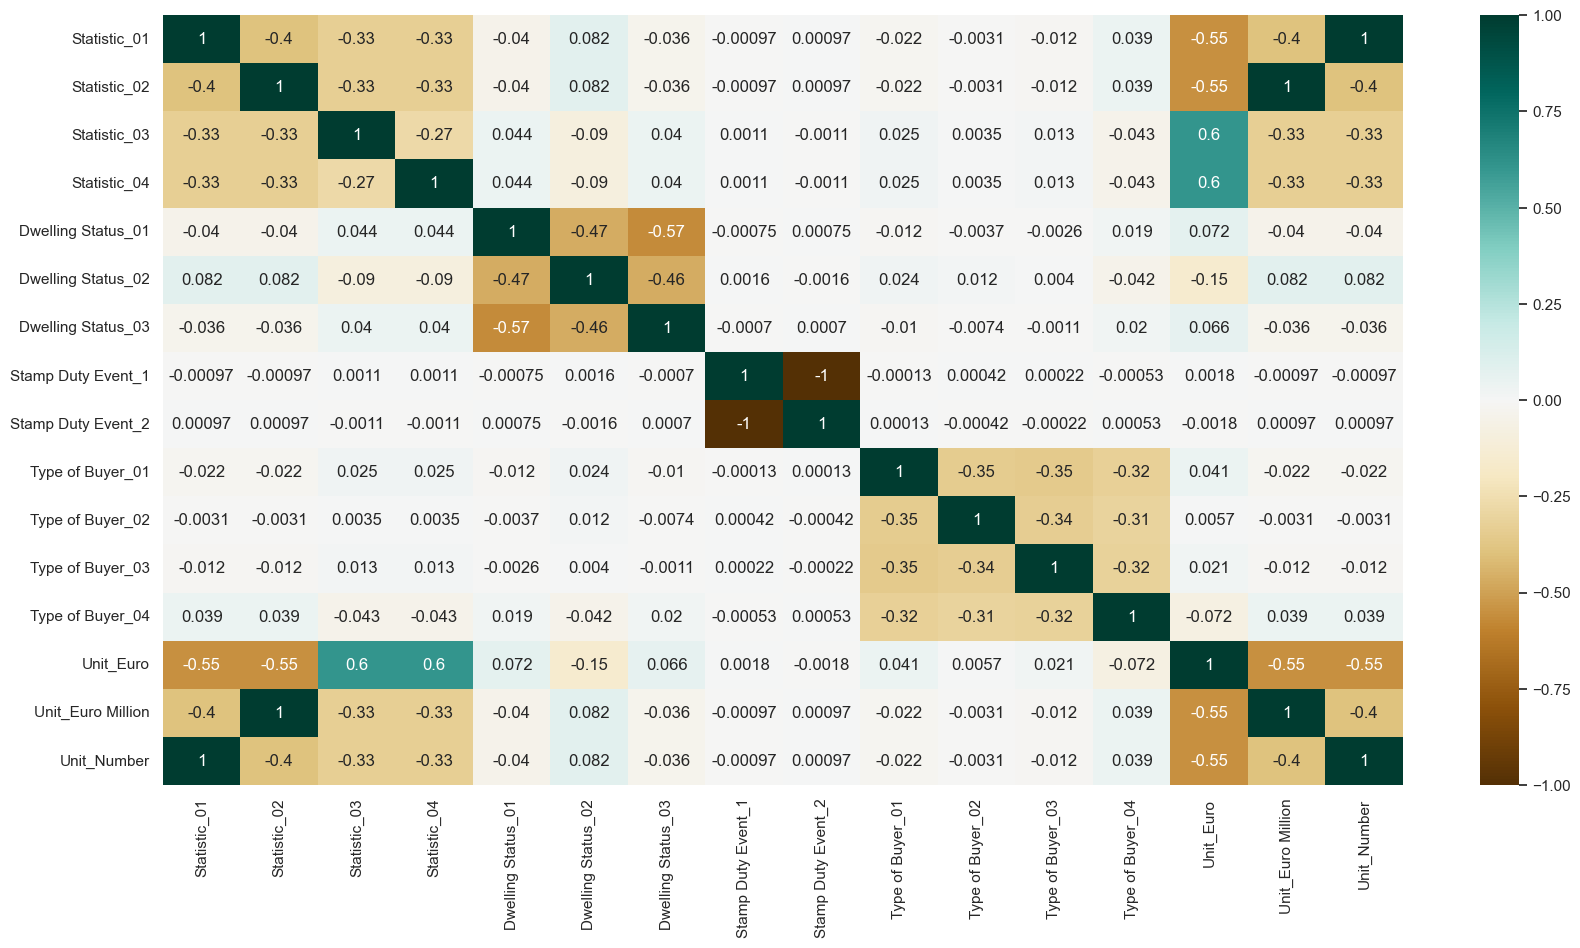

In [47]:
df_numeric = df.select_dtypes(include = ['bool'])

plt.figure(figsize = (20, 10))
correlation_matrix = df_numeric.corr()

sns.heatmap(correlation_matrix, cmap = "BrBG", annot = True)
correlation_matrix

- Statistic - 1: Volume of Sales, 2: Value of Sales, 3: Mean Sale Price and 4: Median Price
- Dwelling Status - 1: All Dwelling Statuses, 2: New and 3: Existing
- Stamp Duty Event - 1: Filings and 2: Executions
- Type of Buyer - 1: All Buyer Types, 2: Household Buyer - First-Time Buyer Owner-Occupier, 3: Household Buyer - Former Owner-Occupier and 4: Household Buyer - Non-Occupier

In [ ]:
# df['Statistic'].head() 

df[(df['Statistic'] == 1) & (df['Type of Buyer'] == '1')].head(10)

### DATA DICTIONARY

**STATISTIC -> Statistic ID:**
- HPM04C01: Volume of Sales (Number)
- HPM04C02: Value of Sales (Euro Million)
- HPM04C03: Mean Sale Price (Euro)
- HPM04C04: Median Price (Euro)

**Statistic Label**
- Volume of Sales: Volume of Sales (Number)
- Value of Sales: Value of Sales (Euro Million)
- Mean Sale Price: Mean Sale Price (Euro)
- Median Price: Median Price (Euro)

**TLIST(M1) -> Year Month**
- Range from 2022-Jan to 2024-Jan: "202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208, 202209, 202210, 202211, 202212, 202301, 202302, 202303, 202304, 202305, 202306, 202307, 202308, 202309, 202310, 202311, 202312, 202401"

**Month**
- Rage from 2022 Janeiro to 2024 Janeiro: "'2022 January', '2022 February', '2022 March', '2022 April', '2022 May', '2022 June', '2022 July', '2022 August', '2022 September', '2022 October', '2022 November', '2022 December', '2023 January', '2023 February', '2023 March', '2023 April', '2023 May', '2023 June', '2023 July', '2023 August', '2023 September', '2023 October', '2023 November', '2023 December', '2024 January'"

**C03346V04033 -> Dwelling Status ID**
- '-' - All Dwelling Statuses
- 01 - New
- 02 - Existing

**Dwelling Status**
- All Dwelling Statuses
- New
- Existing

**C03349V04063 -> Eircode ID**
- '-' - All 
- 'A41', 'A42', 'A45', 'A63', 'A67', 'A75', 'A81', 'A82', 'A83', 'A84', 'A85', 'A86', 'A91', 'A92', 'A94', 'A96', 'A98', 'C15', 'D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D20', 'D22', 'D24', 'D6W', 'E21', 'E25', 'E32', 'E34', 'E41', 'E45', 'E53', 'E91', 'F12', 'F23', 'F26', 'F28', 'F31', 'F35', 'F42', 'F45', 'F52', 'F56', 'F91', 'F92', 'F93', 'F94', 'H12', 'H14', 'H16', 'H18', 'H23', 'H53', 'H54', 'H62', 'H65', 'H71', 'H91', 'K32', 'K34', 'K36', 'K45', 'K56', 'K67', 'K78', 'N37', 'N39', 'N41', 'N91', 'P12', 'P14', 'P17', 'P24', 'P25', 'P31', 'P32', 'P36', 'P43', 'P47', 'P51', 'P56', 'P61', 'P67', 'P72', 'P75', 'P81', 'P85', 'R14', 'R21', 'R32', 'R35', 'R42', 'R45', 'R51', 'R56', 'R93', 'R95', 'T12', 'T23', 'T34', 'T45', 'T56', 'V14', 'V15', 'V23', 'V31', 'V35', 'V42', 'V92', 'V93', 'V94', 'V95', 'W12', 'W23', 'W34', 'W91', 'X35', 'X42', 'X91', 'Y14', 'Y21', 'Y25', 'Y34', 'Y35'

**Eircode Output -> Eircode**
- 'All'
- Eircodes

**C03341V04028 - Stamp Duty Event ID**
- 1: Filings
- 2: Executions

**Stamp Duty Event** 
- Filings
- Executions

**C03344V04031 -> Type of Buyer ID** 
- '-' - All Buyer Types
- 02 - Household Buyer - First-Time Buyer Owner-Occupier
- 03 - Household Buyer - Former Owner-Occupier
- 04 - Household Buyer - Non-Occupier

**Type of Buyer** 
- All Buyer Types
- Household Buyer - First-Time Buyer Owner-Occupier
- Household Buyer - Former Owner-Occupier
- Household Buyer - Non-Occupier

**UNIT -> Unit**
- Number
- Euro Million
- Euro

**VALUE -> Price**
Price of the property